In [1]:
from roboflow import Roboflow
rf = Roboflow(api_key="Vz9bfTDQSXRebRa1W1ft")
project = rf.workspace("fona").project("food-detection-yvcmw")
version = project.version(8)
dataset = version.download("multiclass")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Food-Detection-8 in multiclass:: 100%|█████████| 2908/2908 [00:01<00:00, 1925.02it/s]


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from tabulate import tabulate
from termcolor import colored
import os

<Axes: >

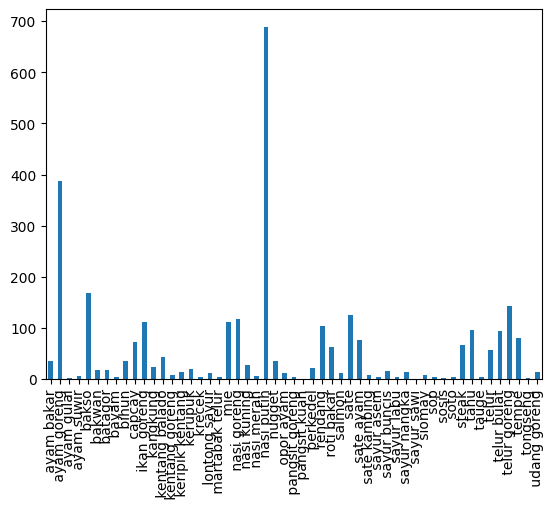

In [6]:

train_df = pd.read_csv(os.path.join(dataset.location, 'train', '_classes.csv'))
valid_df = pd.read_csv(os.path.join(dataset.location, 'valid', '_classes.csv'))
test_df = pd.read_csv(os.path.join(dataset.location, 'test', '_classes.csv'))

pred_class = list(train_df.drop(columns=['filename']).columns)

for i, trial in train_df.iterrows():
  train_df.loc[i, "filename"] = os.path.join(dataset.location, "train", train_df.loc[i, "filename"])

for i, trial in valid_df.iterrows():
  valid_df.loc[i, "filename"] = os.path.join(dataset.location, "valid", valid_df.loc[i, "filename"])

for i, trial in test_df.iterrows():
  test_df.loc[i, "filename"] = os.path.join(dataset.location, "test", test_df.loc[i, "filename"])

x_train = list(train_df['filename'])
x_valid = list(valid_df['filename'])

y_train = train_df.drop(columns=['filename']).to_numpy()
y_valid = valid_df.drop(columns=['filename']).to_numpy()
y_test = test_df.drop(columns=['filename']).to_numpy()

# dataset_df = pd.concat([train_df, valid_df, test_df])

# x_ds = list(dataset_df['filename'])
# y_ds = dataset_df.drop(columns=['filename']).to_numpy()
pd.DataFrame(y_train, columns=pred_class).sum().plot.bar()

In [7]:
for clas in pred_class:
  print(clas)

 ayam bakar
 ayam goreng
 ayam gulai
 ayam suwir
 bakso
 bakwan
 batagor
 bayam
 bihun
 capcay
 ikan goreng
 kangkung
 kentang balado
 kentang goreng
 keripik kentang
 kerupuk
 krecek
 lontong sayur
 martabak telur
 mie
 nasi goreng
 nasi kuning
 nasi merah
 nasi putih
 nugget
 opor ayam
 pangsit goreng
 pangsit kuah
 perkedel
 rendang
 roti bakar
 salmon
 sate
 sate ayam
 sate kambing
 sayur asem
 sayur buncis
 sayur labu
 sayur nangka
 sayur sawi
 siomay
 sop
 sosis
 soto
 steak
 tahu
 tauge
 telur
 telur bulat
 telur goreng
 tempe
 tongseng
 udang goreng


In [8]:
weight_label = pd.DataFrame(y_train).sum()
sum_label = weight_label.sum()
max_label = weight_label.max()
weight_label = 1 / (weight_label / max_label)
weight_label = weight_label.to_dict()
weight_label     

{0: 19.13888888888889,
 1: 1.7757731958762886,
 2: 344.5,
 3: 137.79999999999998,
 4: 4.101190476190476,
 5: 38.27777777777778,
 6: 38.27777777777778,
 7: 172.25,
 8: 19.685714285714287,
 9: 9.438356164383562,
 10: 6.151785714285714,
 11: 28.708333333333336,
 12: 16.023255813953487,
 13: 86.125,
 14: 53.0,
 15: 34.449999999999996,
 16: 172.25,
 17: 57.41666666666667,
 18: 172.25,
 19: 6.151785714285714,
 20: 5.838983050847458,
 21: 25.51851851851852,
 22: 114.83333333333334,
 23: 1.0,
 24: 19.685714285714287,
 25: 62.63636363636364,
 26: 172.25,
 27: inf,
 28: 32.80952380952381,
 29: 6.625,
 30: 10.936507936507935,
 31: 57.41666666666667,
 32: 5.5120000000000005,
 33: 8.948051948051948,
 34: 98.42857142857143,
 35: 172.25,
 36: 45.93333333333334,
 37: 172.25,
 38: 49.214285714285715,
 39: inf,
 40: 86.125,
 41: 229.66666666666669,
 42: 344.5,
 43: 172.25,
 44: 10.28358208955224,
 45: 7.177083333333334,
 46: 172.25,
 47: 12.303571428571429,
 48: 7.408602150537634,
 49: 4.818181818181818

In [11]:
train_df.info()
valid_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 54 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   filename          1995 non-null   object
 1    ayam bakar       1995 non-null   int64 
 2    ayam goreng      1995 non-null   int64 
 3    ayam gulai       1995 non-null   int64 
 4    ayam suwir       1995 non-null   int64 
 5    bakso            1995 non-null   int64 
 6    bakwan           1995 non-null   int64 
 7    batagor          1995 non-null   int64 
 8    bayam            1995 non-null   int64 
 9    bihun            1995 non-null   int64 
 10   capcay           1995 non-null   int64 
 11   ikan goreng      1995 non-null   int64 
 12   kangkung         1995 non-null   int64 
 13   kentang balado   1995 non-null   int64 
 14   kentang goreng   1995 non-null   int64 
 15   keripik kentang  1995 non-null   int64 
 16   kerupuk          1995 non-null   int64 
 17   krecek       

In [14]:
train_df.describe()

,ayam bakar,ayam goreng,ayam gulai,ayam suwir,bakso,bakwan,batagor,bayam,bihun,capcay,...,soto,steak,tahu,tauge,telur,telur bulat,telur goreng,tempe,tongseng,udang goreng
count,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,...,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000,1995.000000
mean,0.018045,0.194486,0.001003,0.002506,0.084211,0.009023,0.009023,0.002005,0.017544,0.036591,...,0.002005,0.033584,0.048120,0.002005,0.028070,0.046617,0.071679,0.040100,0.001003,0.007018
std,0.133148,0.395904,0.031654,0.050012,0.277773,0.094581,0.094581,0.044744,0.131319,0.187804,...,0.044744,0.180201,0.214074,0.044744,0.165215,0.210869,0.258021,0.196244,0.031654,0.083497
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
valid_df.describe()

,ayam bakar,ayam goreng,ayam gulai,ayam suwir,bakso,bakwan,batagor,bayam,bihun,capcay,...,soto,steak,tahu,tauge,telur,telur bulat,telur goreng,tempe,tongseng,udang goreng
count,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.0,456.000000,456.000000,...,456.0,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.000000,456.0,456.0
mean,0.004386,0.122807,0.008772,0.004386,0.046053,0.008772,0.008772,0.0,0.006579,0.021930,...,0.0,0.067982,0.026316,0.002193,0.054825,0.046053,0.085526,0.024123,0.0,0.0
std,0.066154,0.328576,0.093349,0.066154,0.209829,0.093349,0.093349,0.0,0.080932,0.146615,...,0.0,0.251992,0.160249,0.046829,0.227888,0.209829,0.279970,0.153599,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,...,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0


In [16]:
test_df.describe()

,ayam bakar,ayam goreng,ayam gulai,ayam suwir,bakso,bakwan,batagor,bayam,bihun,capcay,...,soto,steak,tahu,tauge,telur,telur bulat,telur goreng,tempe,tongseng,udang goreng
count,449.000000,449.000000,449.0,449.0,449.000000,449.0,449.0,449.000000,449.000000,449.000000,...,449.000000,449.000000,449.000000,449.0,449.000000,449.000000,449.000000,449.000000,449.0,449.0
mean,0.015590,0.138085,0.0,0.0,0.022272,0.0,0.0,0.008909,0.013363,0.013363,...,0.008909,0.066815,0.042316,0.0,0.042316,0.020045,0.077951,0.048998,0.0,0.0
std,0.124022,0.345374,0.0,0.0,0.147730,0.0,0.0,0.094069,0.114952,0.114952,...,0.094069,0.249980,0.201534,0.0,0.201534,0.140309,0.268394,0.216104,0.0,0.0
min,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
25%,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
50%,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
75%,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
max,1.000000,1.000000,0.0,0.0,1.000000,0.0,0.0,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,0.0,0.0
